In [1]:
# Imports:
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [2]:
# Preprocessing

# Load the CSV file into a DataFrame
df = pd.read_csv('dataset.csv')

# Define the genres you are interested in
genre_filter = ['acoustic', 'electronic', 'pop', 'rock', 'folk', 'emo', 'alternative']

# Filter the DataFrame to only include rows where the Genre column matches one of the desired genres
filtered_df = df[df['track_genre'].isin(genre_filter)]

# # Save the filtered DataFrame to a new CSV file
# filtered_df.to_csv('filtered_dataset.csv', index=False)

# Calculate the distribution of the 'track_genre' column
genre_distribution = filtered_df['track_genre'].value_counts()

# Print the distribution
print(genre_distribution)

track_genre
acoustic       1000
alternative    1000
electronic     1000
emo            1000
folk           1000
pop            1000
rock           1000
Name: count, dtype: int64


In [3]:
# Load Training Dataset

# Specify the columns to drop
# Dropped all unique identifiers + duration, key, mode, and time signature due to low correlation to genre in corr matrix
columns_to_drop = ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name']

# Remove the specified columns
filteredTrainingFrame =  filtered_df.drop(columns=columns_to_drop)

# Define the mapping dictionary
genre_mapping = { 
    'acoustic': 1,
    'electronic': 2,
    'pop': 3,
    'rock': 4,
    'folk': 5,
    'emo': 6,
    'alternative': 7
    }

# Map the track_genre column to integers
filteredTrainingFrame['track_genre_int'] = filteredTrainingFrame['track_genre'].map(genre_mapping)

filteredTrainingFrame =  filteredTrainingFrame.drop(columns=['track_genre'])
print(filteredTrainingFrame.head())


   popularity  duration_ms  explicit  danceability  energy  key  loudness  \
0          73       230666     False         0.676  0.4610    1    -6.746   
1          55       149610     False         0.420  0.1660    1   -17.235   
2          57       210826     False         0.438  0.3590    0    -9.734   
3          71       201933     False         0.266  0.0596    0   -18.515   
4          82       198853     False         0.618  0.4430    2    -9.681   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     0       0.1430        0.0322          0.000001    0.3580    0.715   
1     1       0.0763        0.9240          0.000006    0.1010    0.267   
2     1       0.0557        0.2100          0.000000    0.1170    0.120   
3     1       0.0363        0.9050          0.000071    0.1320    0.143   
4     1       0.0526        0.4690          0.000000    0.0829    0.167   

     tempo  time_signature  track_genre_int  
0   87.917               4              

In [4]:
# Correlation Matrix

# Compute the correlation matrix
correlation_matrix = filteredTrainingFrame.corr()

# Display the correlation matrix
print(correlation_matrix)

                  popularity  duration_ms  explicit  danceability    energy  \
popularity          1.000000     0.001977  0.098196      0.105412 -0.099522   
duration_ms         0.001977     1.000000 -0.184788     -0.156806  0.052405   
explicit            0.098196    -0.184788  1.000000      0.194339  0.047545   
danceability        0.105412    -0.156806  0.194339      1.000000  0.001293   
energy             -0.099522     0.052405  0.047545      0.001293  1.000000   
key                -0.028070    -0.005487 -0.007433      0.009245  0.048597   
loudness           -0.076680    -0.042588  0.071273      0.007374  0.771924   
mode               -0.047615    -0.005177 -0.055635     -0.115342 -0.100148   
speechiness         0.054378    -0.109326  0.303518      0.189809  0.148965   
acousticness        0.093522    -0.017288 -0.128218     -0.075042 -0.736086   
instrumentalness    0.051990     0.111727 -0.078973      0.048200 -0.017824   
liveness           -0.038797     0.064110  0.033065 

In [36]:
X = filteredTrainingFrame.drop(columns=['track_genre_int', 'duration_ms', 'key', 'mode', 'time_signature', 'tempo'])
y = filteredTrainingFrame['track_genre_int']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the sizes of the train and test datasets
print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)


# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X.head())

Training set size: (5600, 10) (5600,)
Testing set size: (1400, 10) (1400,)
   popularity  explicit  danceability  energy  loudness  speechiness  \
0          73     False         0.676  0.4610    -6.746       0.1430   
1          55     False         0.420  0.1660   -17.235       0.0763   
2          57     False         0.438  0.3590    -9.734       0.0557   
3          71     False         0.266  0.0596   -18.515       0.0363   
4          82     False         0.618  0.4430    -9.681       0.0526   

   acousticness  instrumentalness  liveness  valence  
0        0.0322          0.000001    0.3580    0.715  
1        0.9240          0.000006    0.1010    0.267  
2        0.2100          0.000000    0.1170    0.120  
3        0.9050          0.000071    0.1320    0.143  
4        0.4690          0.000000    0.0829    0.167  


In [55]:
def getStats(model):
    # Model Statistics
    # print("getting statistics...")

    y_trainPred = model.predict(X_train_scaled)

    y_pred = model.predict(X_test_scaled)

    testAccuracy = accuracy_score(y_test, y_pred)

    trainAccuracy = accuracy_score(y_train, y_trainPred)

    # print(f"Testing Accuracy of the Logistic Regression model: {testAccuracy:.2f}")
    # print(f"Training Accuracy of the Logistic Regression model: {trainAccuracy:.2f}")

    # print("done!")
    testPrecision = get_more_statistics(y_pred,y_test)
    trainPrecision = get_more_statistics(y_trainPred,y_train)

    return testAccuracy, trainAccuracy, testPrecision, trainPrecision
def get_more_statistics(pred, y_test):
    true_counts = [0] * 7
    false_counts = [0] * 7

    for index, prediction in enumerate(pred):
        actual_value = y_test.iloc[index]  # Correct use of .iloc for positional indexing
        if 1 <= prediction <= 7:
            if prediction == actual_value:
                true_counts[prediction - 1] += 1
            else:
                false_counts[prediction - 1] += 1

    # Calculate precision for each class, avoiding division by zero
    precision = []
    for i in range(7):
        if true_counts[i] + false_counts[i] > 0:
            precision.append(true_counts[i] / (true_counts[i] + false_counts[i]))
        else:
            precision.append(0)  # Precision is undefined if there are no true or false positives

    return precision

    true1 = 0
    true2 = 0
    true3 = 0
    true4 = 0
    true5 = 0
    true6 = 0
    true7 = 0

    false1 = 0
    false2 = 0
    false3 = 0
    false4 = 0
    false5 = 0
    false6 = 0
    false7 = 0

    index = 0
    for i in pred:
        if i == 1:
            if y_test.ilok(index) == 1:
                true1 += 1
            else:
                false1 += 1
        if i == 2:
            if y_test[index] == 2:
                true2 += 1
            else:
                false2 += 1
        if i == 3:
            if y_test[index] == 3:
                true3 += 1
            else:
                false3 += 1
        if i == 4:
            if y_test[index] == 4:
                true4 += 1
            else:
                false4 += 1
        if i == 5:
            if y_test[index] == 5:
                true5 += 1
            else:
                false5 += 1
        if i == 6:
            if y_test[index] == 6:
                true6 += 1
            else:
                false6 += 1
        if i == 7:
            if y_test[index] == 7:
                true7 += 1
            else:
                false7 += 1
        index += 1

        # totalTrue = true1 + true2 + true3 + true4 + true5 + true6 + true7
        # accuracy = totalTrue / len(y_test)

        precision = [true1/(true1 + false1), true2/(true2 + false2), true3/(true3 + false3), true4/(true4 + false4), true5/(true5 + false5), true6/(true6 + false6), true7/(true7 + false7)]

    return precision


In [38]:
# Train Logistic Regression:

# Run Logistic Regression Training and Testing
    # lr: learning rate (0 to 1.0)
    # e: epochs (iterations)

def runLogReg(lr, e):
    logreg = LogisticRegression(C=lr, max_iter=e) #, class_weight='balanced')
    # print("training logistic regression model...")
    logreg.fit(X_train_scaled, y_train)
    # print("done!")
    return logreg

lr = 0.78
e = 6
logreg = runLogReg(lr, e)

getStats(logreg)

(0.4328571428571429, 0.41910714285714284)

In [39]:
# Train MLP
# Create an MLP Classifier

def runMLP(hidden, e, activation):
    mlp = MLPClassifier(hidden_layer_sizes=hidden, max_iter=e, activation=activation,
                        solver='adam', random_state=1)
    # Train the MLP
    mlp.fit(X_train_scaled, y_train)    
    return mlp


hiddenL = (100,)
e = 300
activationFunc = 'relu'
mlp = runMLP(hiddenL, e, activationFunc)

getStats(mlp)

(0.5835714285714285, 0.6358928571428571)

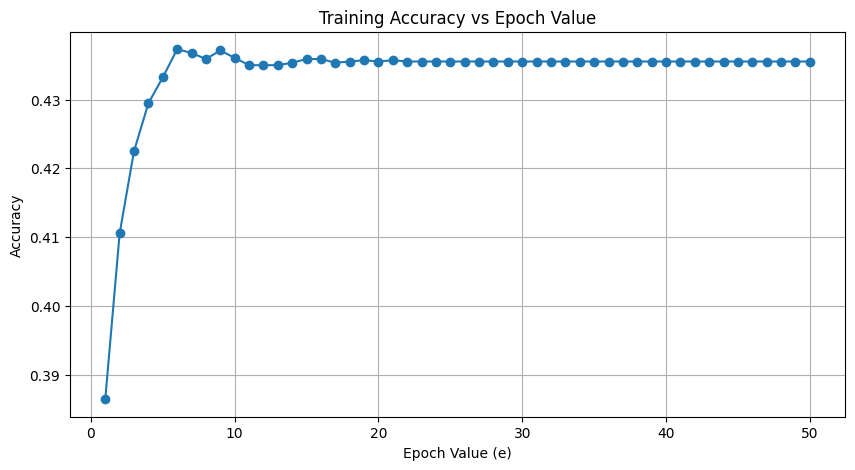

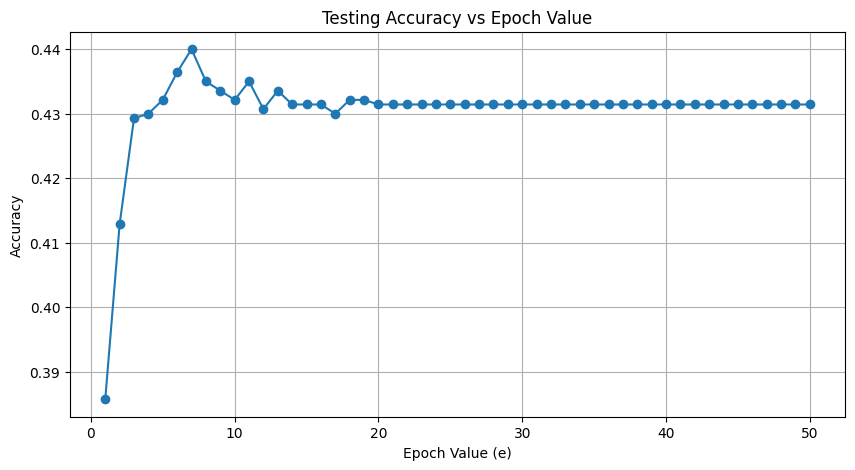

Best e value:
7


In [17]:
# Testing Logistic regression hyperparams:
trainAccuracies = []
testAccuracies = []
eVal = []
# Test epoch
lr = 0.83
e = 1

for i in range(50):
    logreg = runLogReg(lr, e)
    stats = getStats(logreg)
    
    trainAccuracies.append(stats[1])
    testAccuracies.append(stats[0])
    eVal.append(e)

    e += 1


# Creating the plot
plt.figure(figsize=(10, 5))  # Sets the figure size
plt.plot(eVal, trainAccuracies, marker='o')  # Plots the data with circles at each data point
plt.title('Training Accuracy vs Epoch Value')  # Title of the plot
plt.xlabel('Epoch Value (e)')  # Label for the x-axis
plt.ylabel('Accuracy')  # Label for the y-axis
plt.grid(True)  # Adds a grid for easier readability
plt.show()  # Displays the plot

# # Creating the plot
plt.figure(figsize=(10, 5))  # Sets the figure size
plt.plot(eVal, testAccuracies, marker='o')  # Plots the data with circles at each data point
plt.title('Testing Accuracy vs Epoch Value')  # Title of the plot
plt.xlabel('Epoch Value (e)')  # Label for the x-axis
plt.ylabel('Accuracy')  # Label for the y-axis
plt.grid(True)  # Adds a grid for easier readability
plt.show()  # Displays the plot


# Find the maximum accuracy
max_accuracy = max(testAccuracies)

# Find the index of the maximum accuracy
index_of_max = testAccuracies.index(max_accuracy)

# Retrieve the corresponding epoch value (e)
e_at_max_accuracy = eVal[index_of_max]

print("Best e value:")
print(e_at_max_accuracy)

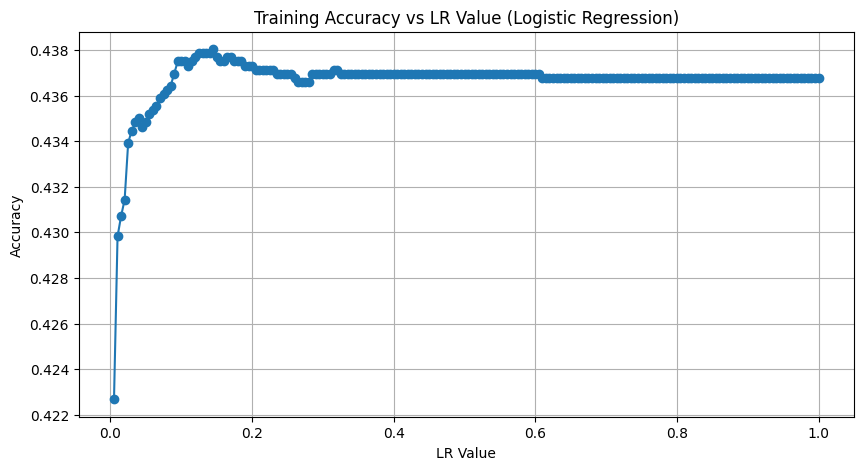

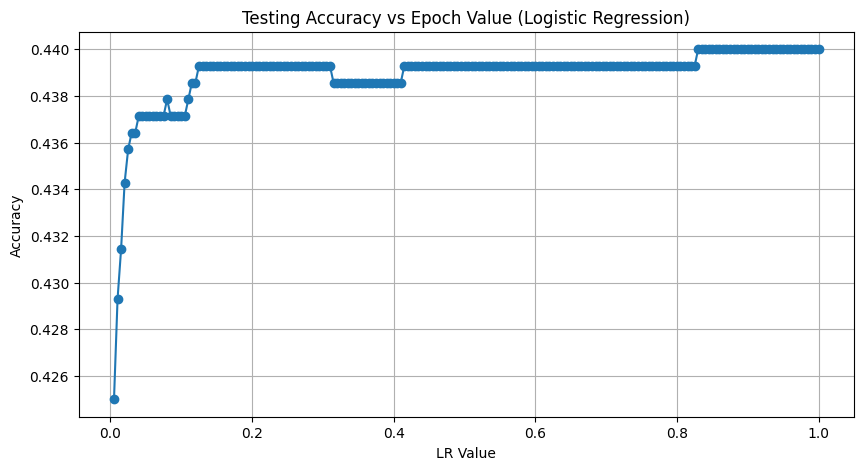

Best lr value:
0.8300000000000006


In [18]:
# Test learning rate
trainAccuracies = []
testAccuracies = []
lrVal = []
# Test LR
lr = 0.005
e = 7
for i in range(200):
    logreg = runLogReg(lr, e)
    stats = getStats(logreg)
    
    trainAccuracies.append(stats[1])
    testAccuracies.append(stats[0])
    lrVal.append(lr)

    lr += 0.005


# Creating the plot
plt.figure(figsize=(10, 5))  # Sets the figure size
plt.plot(lrVal, trainAccuracies, marker='o')  # Plots the data with circles at each data point
plt.title('Training Accuracy vs LR Value (Logistic Regression)')  # Title of the plot
plt.xlabel('LR Value')  # Label for the x-axis
plt.ylabel('Accuracy')  # Label for the y-axis
plt.grid(True)  # Adds a grid for easier readability
plt.show()  # Displays the plot

# # Creating the plot
plt.figure(figsize=(10, 5))  # Sets the figure size
plt.plot(lrVal, testAccuracies, marker='o')  # Plots the data with circles at each data point
plt.title('Testing Accuracy vs Epoch Value (Logistic Regression)')  # Title of the plot
plt.xlabel('LR Value')  # Label for the x-axis
plt.ylabel('Accuracy')  # Label for the y-axis
plt.grid(True)  # Adds a grid for easier readability
plt.show()  # Displays the plot


# Find the maximum accuracy
max_accuracy = max(testAccuracies)

# Find the index of the maximum accuracy
index_of_max = testAccuracies.index(max_accuracy)

# Retrieve the corresponding epoch value (e)
lr_at_max_accuracy = lrVal[index_of_max]

print("Best lr value:")
print(lr_at_max_accuracy)

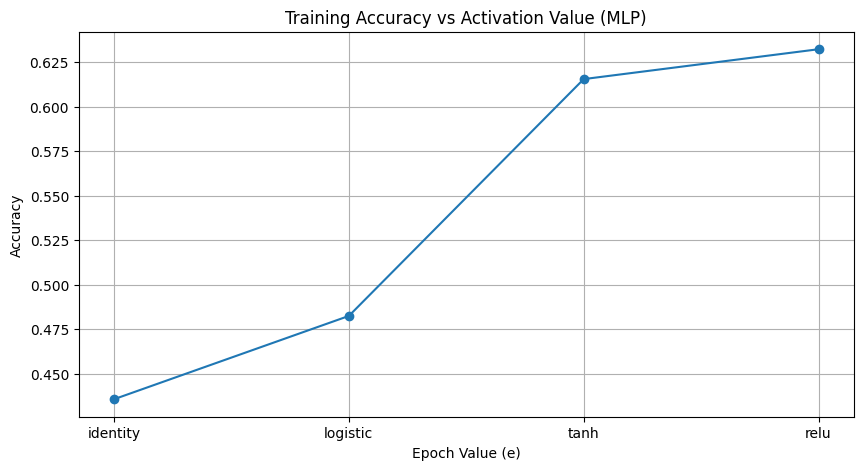

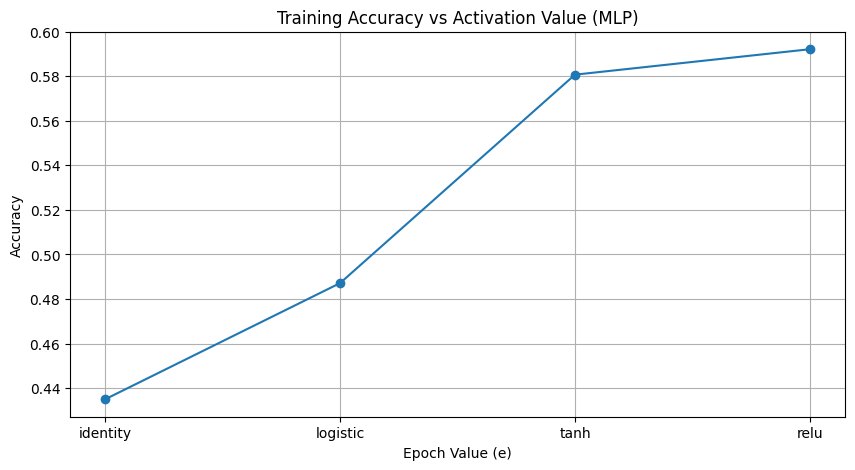

Best activation value:
relu


In [19]:
# Testing MLP Hyperparams
# Testing Activation Function

trainAccuracies = []
testAccuracies = []
activationVal = ['identity', 'logistic', 'tanh', 'relu']


hiddenL = (100,)
e = 100
# activationFunc = activationVal[0]

for activation in activationVal:
    mlp = runMLP(hiddenL, e, activation)
    stats = getStats(mlp)
    
    trainAccuracies.append(stats[1])
    testAccuracies.append(stats[0])



# Creating the plot
plt.figure(figsize=(10, 5))  # Sets the figure size
plt.plot(activationVal, trainAccuracies, marker='o')  # Plots the data with circles at each data point
plt.title('Training Accuracy vs Activation Value (MLP)')  # Title of the plot
plt.xlabel('Activation Func')  # Label for the x-axis
plt.ylabel('Accuracy')  # Label for the y-axis
plt.grid(True)  # Adds a grid for easier readability
plt.show()  # Displays the plot

# # Creating the plot
plt.figure(figsize=(10, 5))  # Sets the figure size
plt.plot(activationVal, testAccuracies, marker='o')  # Plots the data with circles at each data point
plt.title('Training Accuracy vs Activation Value (MLP)')  # Title of the plot
plt.xlabel('Activation Func')  # Label for the x-axis
plt.ylabel('Accuracy')  # Label for the y-axis
plt.grid(True)  # Adds a grid for easier readability
plt.show()  # Displays the plot


# Find the maximum accuracy
max_accuracy = max(testAccuracies)

# Find the index of the maximum accuracy
index_of_max = testAccuracies.index(max_accuracy)

# Retrieve the corresponding activation value 
activation_at_max_accuracy = activationVal[index_of_max]

print("Best activation value:")
print(activation_at_max_accuracy)

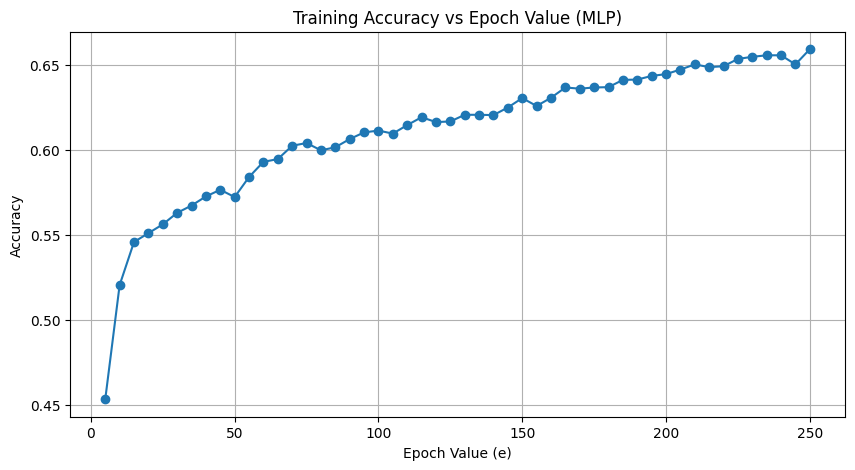

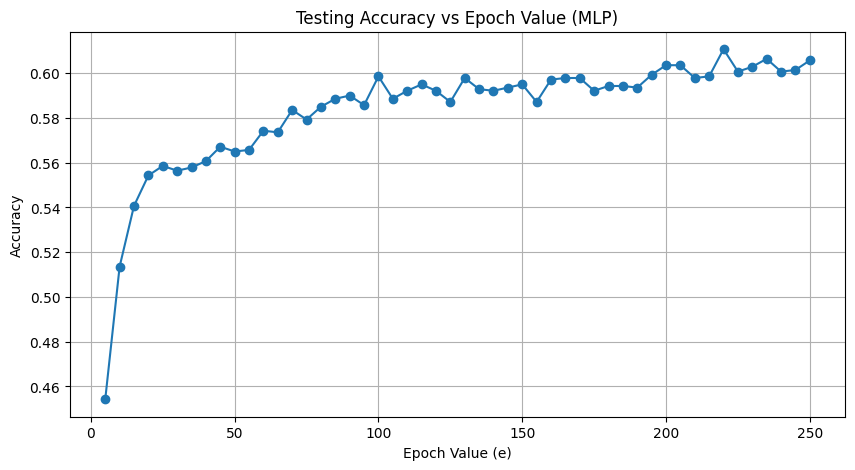

Best e value:
220


In [48]:
# Testing MLP Hyperparams
# Testing Logistic regression hyperparams:
trainAccuracies = []
testAccuracies = []
eVal = []
# Test epoch

hiddenL = (185,)
e = 5
activationFunc = 'relu'

for i in range(50):
    mlp = runMLP(hiddenL, e, activationFunc)
    stats = getStats(mlp)
    
    trainAccuracies.append(stats[1])
    testAccuracies.append(stats[0])
    eVal.append(e)

    e += 5


# Creating the plot
plt.figure(figsize=(10, 5))  # Sets the figure size
plt.plot(eVal, trainAccuracies, marker='o')  # Plots the data with circles at each data point
plt.title('Training Accuracy vs Epoch Value (MLP)')  # Title of the plot
plt.xlabel('Epoch Value (e)')  # Label for the x-axis
plt.ylabel('Accuracy')  # Label for the y-axis
plt.grid(True)  # Adds a grid for easier readability
plt.show()  # Displays the plot

# # Creating the plot
plt.figure(figsize=(10, 5))  # Sets the figure size
plt.plot(eVal, testAccuracies, marker='o')  # Plots the data with circles at each data point
plt.title('Testing Accuracy vs Epoch Value (MLP)')  # Title of the plot
plt.xlabel('Epoch Value (e)')  # Label for the x-axis
plt.ylabel('Accuracy')  # Label for the y-axis
plt.grid(True)  # Adds a grid for easier readability
plt.show()  # Displays the plot


# Find the maximum accuracy
max_accuracy = max(testAccuracies)

# Find the index of the maximum accuracy
index_of_max = testAccuracies.index(max_accuracy)

# Retrieve the corresponding epoch value (e)
e_at_max_accuracy = eVal[index_of_max]

print("Best e value:")
print(e_at_max_accuracy)

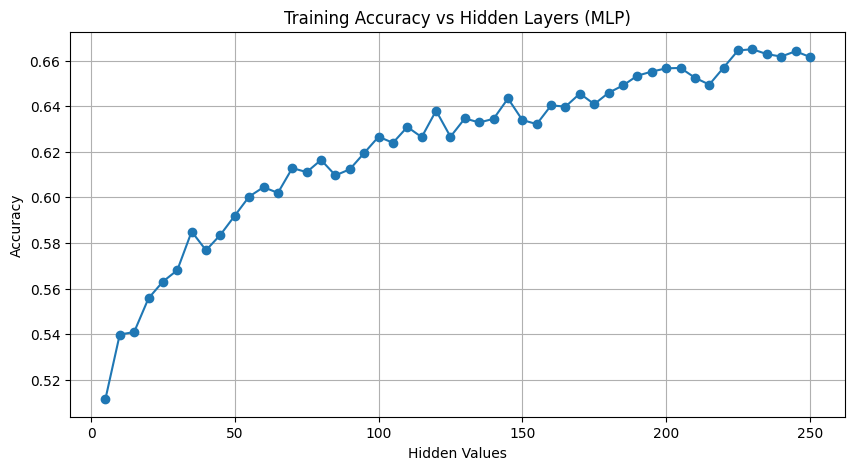

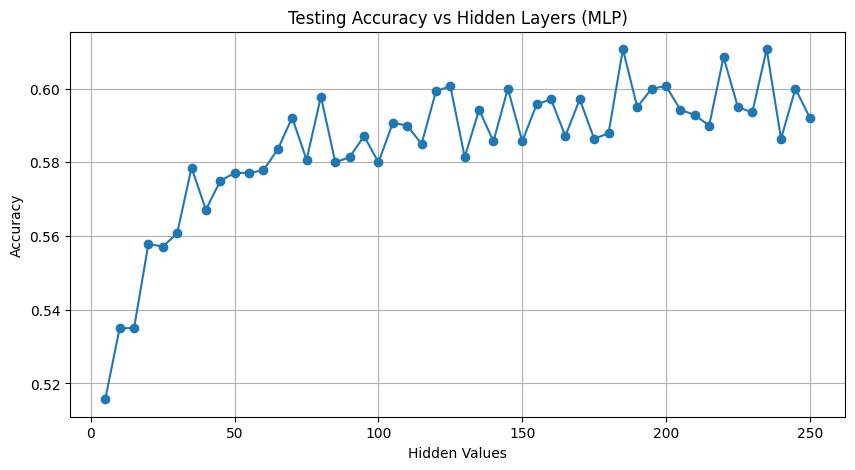

Best hidden value:
185


In [46]:
# Testing MLP Hyperparams
# Testing Logistic regression hyperparams:
trainAccuracies = []
testAccuracies = []
hiddenVal = []
# Test epoch
val = 5
e = 220
activationFunc = 'relu'

for i in range(50):
    hiddenL = (val,)
    mlp = runMLP(hiddenL, e, activationFunc)
    stats = getStats(mlp)
    
    trainAccuracies.append(stats[1])
    testAccuracies.append(stats[0])
    hiddenVal.append(val)

    val += 5


# Creating the plot
plt.figure(figsize=(10, 5))  # Sets the figure size
plt.plot(hiddenVal, trainAccuracies, marker='o')  # Plots the data with circles at each data point
plt.title('Training Accuracy vs Hidden Layers (MLP)')  # Title of the plot
plt.xlabel('Hidden Values')  # Label for the x-axis
plt.ylabel('Accuracy')  # Label for the y-axis
plt.grid(True)  # Adds a grid for easier readability
plt.show()  # Displays the plot

# # Creating the plot
plt.figure(figsize=(10, 5))  # Sets the figure size
plt.plot(hiddenVal, testAccuracies, marker='o')  # Plots the data with circles at each data point
plt.title('Testing Accuracy vs Hidden Layers (MLP)')  # Title of the plot
plt.xlabel('Hidden Values')  # Label for the x-axis
plt.ylabel('Accuracy')  # Label for the y-axis
plt.grid(True)  # Adds a grid for easier readability
plt.show()  # Displays the plot


# Find the maximum accuracy
max_accuracy = max(testAccuracies)

# Find the index of the maximum accuracy
index_of_max = testAccuracies.index(max_accuracy)

# Retrieve the corresponding epoch value (e)
hidden_at_max_accuracy = hiddenVal[index_of_max]

print("Best hidden value:")
print(hidden_at_max_accuracy)

In [57]:
# After tuning hyperparams:

lr = 0.83
e = 7
finalLogreg = runLogReg(lr, e)
logregStats = getStats(logreg)

print("Logistic Regression Test Accuracy:")
print(logregStats[0])
print("Logistic Regression Test Class Precision (TP/TP+FP):")
print(logregStats[2])


hiddenL = (185,)
e = 220
activationFunc = 'relu'
mlp = runMLP(hiddenL, e, activationFunc)
mlpStats = getStats(mlp)

print("\nMLP Test Accuracy:")
print(mlpStats[0])
print("MLP Test Class Precision (TP/TP+FP):")
print(mlpStats[2])

Logistic Regression Test Accuracy:
0.4328571428571429
Logistic Regression Test Class Precision (TP/TP+FP):
[0.4708994708994709, 0.5314285714285715, 0.325, 0.40076335877862596, 0.37714285714285717, 0.5463917525773195, 0.41818181818181815]

MLP Test Accuracy:
0.6107142857142858
MLP Test Class Precision (TP/TP+FP):
[0.6871794871794872, 0.6086956521739131, 0.7110091743119266, 0.48616600790513836, 0.4896551724137931, 0.717948717948718, 0.5714285714285714]
